# Before we do anything else let's download all the required libraries

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
%matplotlib inline

from plotly import __version__
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [28]:
#Import our statistical libraries

import scipy as stats

# Hypothesis: Avocados sold better in 2015 than in 2019 [Placeholder]

In [29]:
#Random hypothesis title
#I named everything after things you can eat avocado with
#I will fix the names later when we agree on universal names
#Let's add the month and day

avo=pd.read_csv('avocado-updated-2020.csv')
avo

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico


### Downloaded our Data for Avocado and titled it "avo." For the most part I will use "avo" or put "a" in front most of the dataset names. Next I will add Month to add more variation for our Dataset. Also for those that are wondering what 4046, 4225, and 4770 mean, that is the PLU (Product Label Unit) code for the different Avocado sizes i.e. 4046 is Small, 4225 is Large, and 4770 are Extra Large.

In [30]:
avo['month']=pd.DatetimeIndex(avo['date']).month
avo

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.,5
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West,5
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West,5
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico,5


### Next we will change the names of our columns in our Dataset to make it look a little cleaner. We will add 'S', 'L', and 'XL' next to their respective PLU code to make it easier to remember what size we are working with.

In [31]:
avo1=avo.rename(columns={'date':'Date',
'4046':'4046S',
'4225':'4225L',
'4770':'4770XL', 
'average_price':'AvgPr', 
'total_volume':'TVol', 
'total_bags':'TBags', 
'small_bags':'SBags', 
'large_bags':'LBags',  
'xlarge_bags':'XLBags',
'type':'Type', 
'year':'Year',
'geography':'Location', 
'month':'Month',
'day':'Day'})
avo1

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,XLBags,Type,Year,Location,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.,5
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West,5
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West,5
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico,5


### For now let's get rid of Organic and XL Bags due to the over abundance of null values in these two columns. We dropped XL Bags as there are more significant null values in both for "Organic" and "Conventional" types. We also made two data sets where one only has "Conventional" and another for "Organic." 

In [32]:
#Unfortunately Organic and XL Bags had a lot of 0 values that messed with our data
avo_D= avo1.drop(['XLBags'], axis=1)
#Next we will drop the Organic part of our data after some trial and error we picked Date and Location for this
#If we just used Date it would only give us data from Albany. If we just used Location it only gave data from the first month
avo2= avo_D[avo1.Type!='organic']
avo3= avo_D[avo1.Type!='conventional']

avo2.head(2)

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,conventional,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,conventional,2015,Atlanta,1


### Let's setup two data sets to compare 2015 and 2019 titled 'a2015' and 'a2019'. We chose 2019 instead of 2020 because it is currently incomplete as the data stops on June 17, 2020. I will use avo2 since it has no "Organic" and won't mess with our data going forward.

In [33]:
#We picked 2019 instead of 2020 due to the fact 2020 data is currently incomplete
#I want to see what avocados were like in 2015 to start off 
a2015 = avo2.loc[avo1['Year']==2015]
a2015

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,conventional,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,conventional,2015,Atlanta,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,conventional,2015,Baltimore/Washington,1
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,conventional,2015,Boise,1
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,conventional,2015,Boston,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,2015-12-27,1.36,42344.22,828.65,23560.51,14.41,17940.65,17940.65,0.00,conventional,2015,Syracuse,12
5607,2015-12-27,0.97,376187.98,246326.83,35652.12,56.54,94152.49,55850.56,38301.93,conventional,2015,Tampa,12
5609,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,conventional,2015,Total U.S.,12
5611,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,conventional,2015,West,12


In [34]:
#Now repeat the process for 2019
a2019= avo2.loc[avo1['Year']==2019]
a2019

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
22245,2019-01-07,1.07,129222.29,3789.30,112635.18,158.00,12639.81,8877.95,3761.86,conventional,2019,Albany,1
22247,2019-01-07,0.92,828971.15,388574.98,38902.85,3482.04,398011.28,299475.26,98477.41,conventional,2019,Atlanta,1
22249,2019-01-07,1.31,925391.38,102652.85,530128.43,8212.94,284397.16,263150.78,21233.05,conventional,2019,Baltimore/Washington,1
22251,2019-01-07,1.23,108261.98,43723.19,7085.86,14435.46,43017.47,23932.54,19049.95,conventional,2019,Boise,1
22253,2019-01-07,1.34,767731.38,11483.09,597937.87,2510.57,155799.85,109108.51,46691.34,conventional,2019,Boston,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27851,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,conventional,2019,Syracuse,12
27853,2019-12-29,0.84,673884.40,228420.96,20786.42,1569.02,423108.00,87462.15,335645.85,conventional,2019,Tampa,12
27855,2019-12-29,0.92,39387849.97,11755125.67,7518140.74,695276.47,19419307.09,10764993.72,7997196.35,conventional,2019,Total U.S.,12
27857,2019-12-29,0.92,6927559.92,1609179.97,985081.34,49846.87,4283451.74,1900050.95,2288497.60,conventional,2019,West,12


### I made a dataset that combines the two years that we are using. We could use this data set for later to make a boxplot or a violinplot comparing the two years to see which year did better in sales, selling a certain size, or to see which location sold better.

In [35]:
#Let's combine both frames to use for a pivot table later
combine= [a2015,a2019]
avo4= pd.concat(combine)
avo4

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,conventional,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,conventional,2015,Atlanta,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,conventional,2015,Baltimore/Washington,1
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,conventional,2015,Boise,1
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,conventional,2015,Boston,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27851,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,conventional,2019,Syracuse,12
27853,2019-12-29,0.84,673884.40,228420.96,20786.42,1569.02,423108.00,87462.15,335645.85,conventional,2019,Tampa,12
27855,2019-12-29,0.92,39387849.97,11755125.67,7518140.74,695276.47,19419307.09,10764993.72,7997196.35,conventional,2019,Total U.S.,12
27857,2019-12-29,0.92,6927559.92,1609179.97,985081.34,49846.87,4283451.74,1900050.95,2288497.60,conventional,2019,West,12


# Let's see how Avocado sales for Large Bags and Large Sized Avocados did in 2015

In [36]:
#For now I will just pull Large Bags, PLU code, the year, average price, geography and the date
#Let's take a peak into 2015
ahead1=a2015[['Date','AvgPr','4225L','LBags','Location']]
ahead1.head(54)

,Date,AvgPr,4225L,LBags,Location
0,2015-01-04,1.22,28287.42,529.53,Albany
2,2015-01-04,1.00,23821.16,30108.64,Atlanta
4,2015-01-04,1.08,552906.04,3990.61,Baltimore/Washington
6,2015-01-04,1.01,24964.23,1691.32,Boise
8,2015-01-04,1.02,396752.18,256.29,Boston
10,2015-01-04,1.40,55693.04,0.00,Buffalo/Rochester
12,2015-01-04,0.93,2267755.26,47882.56,California
14,2015-01-04,1.19,47220.75,6468.53,Charlotte
16,2015-01-04,1.11,550752.19,4651.02,Chicago
18,2015-01-04,0.88,168764.78,37445.46,Cincinnati/Dayton


In [37]:
#Let's see the last available data that we can retrieve
ahead1.tail(54)

,Date,AvgPr,4225L,LBags,Location
5507,2015-12-27,1.33,54454.85,93.25,Albany
5509,2015-12-27,0.99,27350.92,17748.36,Atlanta
5511,2015-12-27,1.17,394104.02,2367.22,Baltimore/Washington
5513,2015-12-27,0.97,2971.94,5.69,Boise
5515,2015-12-27,1.13,346964.70,99.26,Boston
5517,2015-12-27,1.35,39542.83,0.00,Buffalo/Rochester
5519,2015-12-27,0.90,1760956.02,110737.35,California
5521,2015-12-27,0.96,62956.24,2499.62,Charlotte
5523,2015-12-27,0.93,445218.79,1617.67,Chicago
5525,2015-12-27,0.87,100444.22,30968.06,Cincinnati/Dayton


## Just looking at the beginnning and the end of 2015 it looks like Avocados were selling really well in the beginning of the year and had a bit of a drop off in December. Another interesting note our Locations has a mixture of Cities, Counties, and States as opposed to a singular group. As for Total U.S. refers to a mixture of regions grouped together put together by the creator of the dataset. (Not sure if I should show all the Locations for the first and last month might be a bit messy.)

In [38]:
a2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2808 entries, 0 to 5613
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2808 non-null   object 
 1   AvgPr     2808 non-null   float64
 2   TVol      2808 non-null   float64
 3   4046S     2808 non-null   float64
 4   4225L     2808 non-null   float64
 5   4770XL    2808 non-null   float64
 6   TBags     2808 non-null   float64
 7   SBags     2808 non-null   float64
 8   LBags     2808 non-null   float64
 9   Type      2808 non-null   object 
 10  Year      2808 non-null   int64  
 11  Location  2808 non-null   object 
 12  Month     2808 non-null   int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 307.1+ KB


After using .info(), we see that there a lot of float that we can use to manipulate our data in different plots or charts. Even though a majority of our data is float, we can also mix and match with our other data types like Location being an object we can use a barplot with Average Price (AvgPr) or Large Bags (LBags) to compare how each City/County/State did with with one another. Let's use .describe() to se

(Really need to work on describing what I am doing better lol)

In [39]:
a2015.describe()

,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Year,Month
count,2808.000000,2.808000e+03,2.808000e+03,2.808000e+03,2.808000e+03,2.808000e+03,2.808000e+03,2.808000e+03,2808.0,2808.000000
mean,1.077963,1.530128e+06,5.997195e+05,6.134503e+05,5.054050e+04,2.664177e+05,2.206156e+05,4.386368e+04,2015.0,6.519231
std,0.170200,4.356865e+06,1.805085e+06,1.754221e+06,1.508197e+05,7.518535e+05,6.227981e+05,1.338022e+05,0.0,3.422768
min,0.490000,3.585268e+04,5.099400e+02,2.546090e+03,4.000000e+00,3.047170e+03,1.119180e+03,0.000000e+00,2015.0,1.000000
25%,0.980000,1.808846e+05,2.399324e+04,4.541664e+04,8.217050e+02,4.301424e+04,3.289248e+04,8.633075e+02,2015.0,3.750000
50%,1.080000,3.741757e+05,1.036592e+05,1.461677e+05,9.457725e+03,7.159791e+04,6.037929e+04,6.248350e+03,2015.0,6.500000
75%,1.190000,9.824588e+05,3.694096e+05,4.305756e+05,2.797323e+04,1.432031e+05,1.169775e+05,2.969403e+04,2015.0,9.250000
max,1.590000,4.465546e+07,1.893304e+07,1.895648e+07,1.614283e+06,6.743615e+06,5.893642e+06,1.371440e+06,2015.0,12.000000


In [94]:
print('Here are some unique values for 2015:')

a2019.nunique()

Here are some unique values for 2015:


Date          52
AvgPr        135
TVol        2808
4046S       2807
4225L       2808
4770XL      2785
TBags       2807
SBags       2808
LBags       2808
Type           1
Year           1
Location      54
Month         12
dtype: int64

In [41]:
a2015.min()

Date          2015-01-04
AvgPr               0.49
TVol             35852.7
4046S             509.94
4225L            2546.09
4770XL                 4
TBags            3047.17
SBags            1119.18
LBags                  0
Type        conventional
Year                2015
Location          Albany
Month                  1
dtype: object

In [42]:
print(a2015[['AvgPr','LBags','4225L']].mean())

AvgPr         1.077963
LBags     43863.678276
4225L    613450.264387
dtype: float64


In [43]:
a2015['LBags'].median()

6248.35

In [44]:
#I see that LBags sold less let's see if we can get the average of large bags

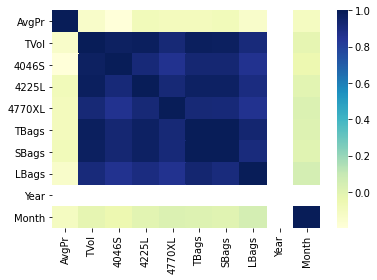

In [45]:
#Average price will not be properly displayed due to being in the negative
#Let's make a heatmap
sns.heatmap(a2015.corr(), cmap='YlGnBu')

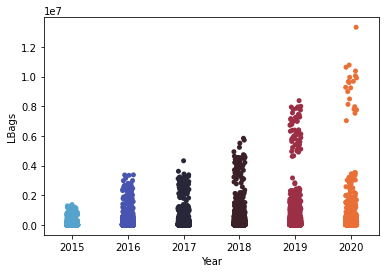

In [46]:
#I want to see which month did better in 2015

sns.stripplot(x='Year', y='LBags', data=avo2, palette='icefire')

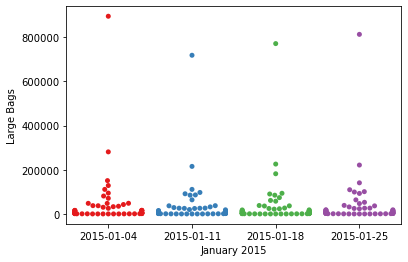

In [47]:
#How many large bags were sold in the U.S. for the first month of January 2015?
#Note to Self clean up the plot maps so that it will look nicer
_=sns.swarmplot(x='Date', y='LBags', data=a2015.head(216), palette='Set1')


#add an x axis label
_=plt.xlabel ('January 2015')

#add a y axix label
_=plt.ylabel('Large Bags')

#show the plot
plt.show()

In [48]:
np.var(a2015)

AvgPr     2.895789e-02
TVol      1.897551e+13
4046S     3.257171e+12
4225L     3.076195e+12
4770XL    2.273847e+10
TBags     5.650824e+11
SBags     3.877393e+11
LBags     1.789665e+10
Year      0.000000e+00
Month     1.171117e+01
dtype: float64

In [49]:
np.percentile(a2015['LBags'],[25,50,75])

array([  863.3075,  6248.35  , 29694.0325])

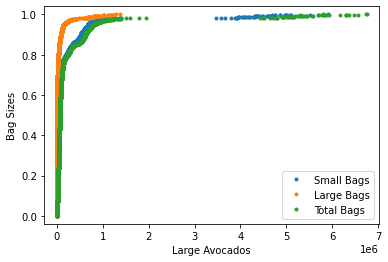

In [50]:
#This is really messy


def ecdf(data):
    """I hope this works"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y




#Compute ECDFs
x_sb, y_sb = ecdf(a2015['SBags'])
x_lb, y_lb = ecdf(a2015['LBags'])
x_tb, y_tb = ecdf(a2015['TBags'])
    

# Plot all ECDFs on the same plot
_ = plt.plot(x_sb, y_sb, marker = '.', linestyle = 'none')
_ = plt.plot(x_lb, y_lb, marker = '.', linestyle = 'none')
_ = plt.plot(x_tb, y_tb, marker = '.', linestyle = 'none')


# Make nice margins
plt.margins(0.04)


# Annotate the plot add a legend locate it at the lower right
plt.legend(('Small Bags', 'Large Bags', 'Total Bags'), loc = 'lower right')
_=plt.xlabel('Large Avocados')
_=plt.ylabel('Bag Sizes')



# Display the plot
plt.show()


In [51]:
#I have no idea why I made this

avo_P= pd.pivot_table(data=a2015, index='4225L', values=['SBags', 'LBags', 'TBags'])
avo_P

,LBags,SBags,TBags
4225L,,,
2546.09,11.43,21900.35,21935.90
2789.67,0.00,15860.63,16057.99
2971.94,5.69,23520.19,23561.10
2985.73,4.44,21842.87,21868.27
3255.97,4.32,17530.67,17547.95
...,...,...,...
14229286.82,1246220.37,3966597.25,5268565.42
14245598.38,1184888.95,4363707.93,5581833.37
14888077.69,1226810.47,4072661.53,5363750.56


In [52]:
avo_pivot= pd.pivot_table(data=avo4, index='Location', values=['AvgPr','TVol', 'LBags', '4225L', 'Type'], columns= 'Year')
avo_pivot.head()

4225L                    AvgPr            \
Year                           2015           2019      2015      2019   
Location                                                                 
Albany                 61764.253654  102825.485000  1.171923  1.260385   
Atlanta                35386.637308   33618.435962  1.052308  1.068846   
Baltimore/Washington  487421.365385  467066.467885  1.168077  1.355000   
Boise                  10164.187115    6748.566923  1.054038  1.335385   
Boston                409901.282692  513963.240385  1.144038  1.396731   

                             LBags                          TVol  \
Year                          2015           2019           2015   
Location                                                           
Albany                  346.097500    5711.570192   76208.734231   
Atlanta               20621.039808   79147.914808  440346.444038   
Baltimore/Washington   4517.016346  108575.997885  768141.489231   
Boise                   354.146538   24528.243654   70885.752885   
Boston                 1451.942692   39781.165769  523780.612115   

                                     
Year                           2019  
Location                             
Albany                122483.080385  
Atlanta               721526.170385  
Baltimore/Washington  919231.600000  
Boise                 102344.003846  
Boston                687918.475577

## Let's check in on how 2019 did in comparison

In [53]:
ahead2=a2019[['Date','AvgPr','4225L','LBags','Location']]
ahead2.head()

,Date,AvgPr,4225L,LBags,Location
22245,2019-01-07,1.07,112635.18,3761.86,Albany
22247,2019-01-07,0.92,38902.85,98477.41,Atlanta
22249,2019-01-07,1.31,530128.43,21233.05,Baltimore/Washington
22251,2019-01-07,1.23,7085.86,19049.95,Boise
22253,2019-01-07,1.34,597937.87,46691.34,Boston


In [54]:
ahead2.tail()

,Date,AvgPr,4225L,LBags,Location
27851,2019-12-29,1.12,39432.09,17943.11,Syracuse
27853,2019-12-29,0.84,20786.42,335645.85,Tampa
27855,2019-12-29,0.92,7518140.74,7997196.35,Total U.S.
27857,2019-12-29,0.92,985081.34,2288497.60,West
27859,2019-12-29,0.84,66511.40,119482.38,West Tex/New Mexico


In [55]:
#
print('Here are some unique values for 2019:', a2019.nunique())

Here are some unique values for 2019: Date          52
AvgPr        135
TVol        2808
4046S       2807
4225L       2808
4770XL      2785
TBags       2807
SBags       2808
LBags       2808
Type           1
Year           1
Location      54
Month         12
dtype: int64


In [56]:
a2019.min()

Date          2019-01-07
AvgPr               0.54
TVol               60154
4046S            1680.41
4225L            3112.58
4770XL                 8
TBags            10275.8
SBags            4703.47
LBags             189.93
Type        conventional
Year                2019
Location          Albany
Month                  1
dtype: object

In [57]:

a2019[['AvgPr','LBags','4225L']].mean()


AvgPr         1.187179
LBags    317068.794772
4225L    509628.327215
dtype: float64

In [58]:
a2019[['AvgPr','LBags','4225L']].median()

AvgPr         1.170
LBags     61037.480
4225L    105968.745
dtype: float64

In [59]:
#Add a statement comparing the smallest to the largest maybe make a graph with it?
a2019.min()

Date          2019-01-07
AvgPr               0.54
TVol               60154
4046S            1680.41
4225L            3112.58
4770XL                 8
TBags            10275.8
SBags            4703.47
LBags             189.93
Type        conventional
Year                2019
Location          Albany
Month                  1
dtype: object

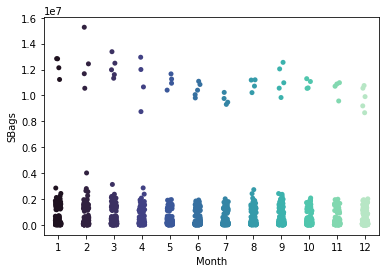

In [60]:
#I want to see which month sold the most in 2019

sns.stripplot(x='Month', y='SBags', data=a2019, palette='mako')

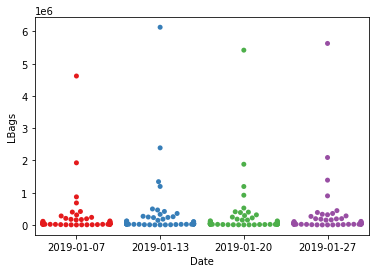

In [61]:
#How did January 2019 do?
sns.swarmplot(x='Date', y='LBags', data=a2019.head(216), palette='Set1')

In [62]:
a2019.corr()

,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Year,Month
AvgPr,1.000000,-0.072129,-0.122616,0.003443,-0.065145,-0.079718,-0.071564,-0.096533,NaN,0.087634
TVol,-0.072129,1.000000,0.983289,0.959713,0.919954,0.992551,0.993200,0.956637,NaN,-0.031240
4046S,-0.122616,0.983289,1.000000,0.908384,0.903187,0.974504,0.975895,0.939624,NaN,-0.046931
4225L,0.003443,0.959713,0.908384,1.000000,0.880856,0.929759,0.943103,0.876621,NaN,-0.058250
4770XL,-0.065145,0.919954,0.903187,0.880856,1.000000,0.907064,0.918935,0.850729,NaN,-0.060914
TBags,-0.079718,0.992551,0.974504,0.929759,0.907064,1.000000,0.991986,0.976379,NaN,-0.001526
SBags,-0.071564,0.993200,0.975895,0.943103,0.918935,0.991986,1.000000,0.941868,NaN,-0.021640
LBags,-0.096533,0.956637,0.939624,0.876621,0.850729,0.976379,0.941868,1.000000,NaN,0.025819
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.087634,-0.031240,-0.046931,-0.058250,-0.060914,-0.001526,-0.021640,0.025819,NaN,1.000000


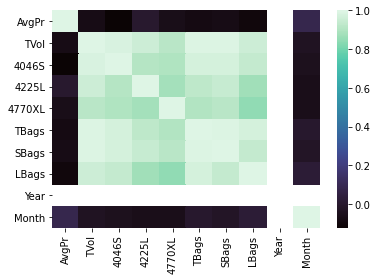

In [63]:
sns.heatmap(a2019.corr(), cmap='mako')

# So which year did better?

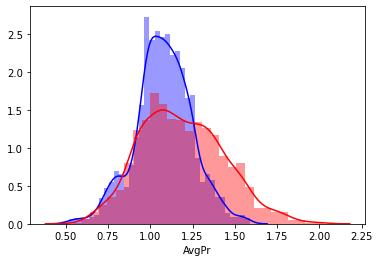

In [64]:


sns.distplot(a2015['AvgPr'], color='#0000ff')
sns.distplot(a2019['AvgPr'], color='#ff0000')


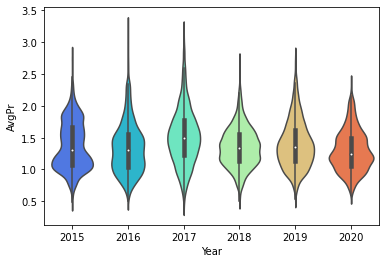

In [65]:
sns.violinplot(x="Year", y="AvgPr", data=avo1,palette='rainbow')

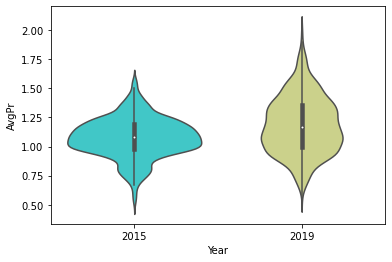

In [66]:
sns.violinplot(x="Year", y="AvgPr", data=avo4,palette='rainbow')

In [67]:
#define a function name it pearson_r that will take two arguments x and y
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat= np.corrcoef(x, y)

    

    # Return entry [0,1]
    return corr_mat[0,1]

    


# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(avo2['Year'], avo2['LBags'])


# Print the result
print(r)

0.17520988677828508


In [68]:
#Now let's make an interactive barplot showing how many Large Avocados were sold in the year
#

avo4.iplot(kind='bar', x='Location', y='4225L', color='#1a75ff')

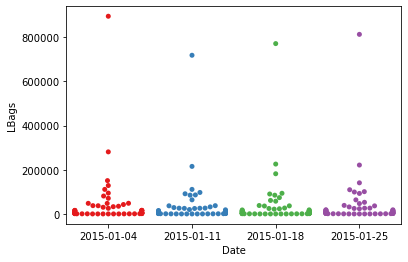

In [45]:
#How many large bags were sold in the U.S. for the first month of January 2015?
#Note to Self clean up the plot maps so that it will look nicer
sns.swarmplot(x='Date', y='LBags', data=a2015.head(216), palette='Set1')

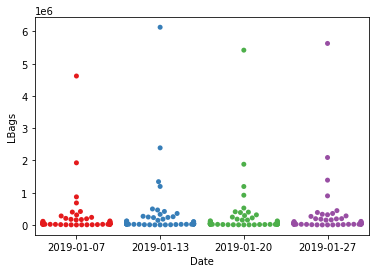

In [46]:
#How did January 2019 do?
sns.swarmplot(x='Date', y='LBags', data=a2019.head(216), palette='Set1')

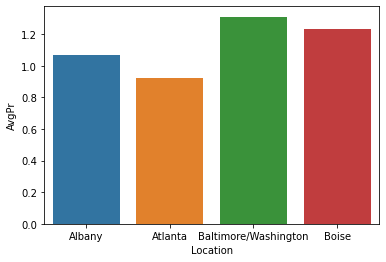

In [47]:
#Let's see the average price for different City/Region
sns.barplot(x='Location', y='AvgPr', data=a2019.head(4))

# Needs Work/ Criticism

In [48]:
# Compute the variance: variance
variance = np.var(a2015['4225L'])


# Print the square root of the variance
print(np.sqrt(variance))


# Print the standard deviation
print(np.std(a2015['LBags']))


1753908.4366444289
133778.35805000958


In [49]:
#Create a list with the names of the regions. We will use it to seperate them from the cities.
avo_Regions=['California','Great Lakes','Midsouth',
         'Northeast','Plains','South Central','Southeast','West']

#Create a dataframe with only the regions using the list that was created.
avo_Regions=avo2.loc[avo2['Location'].isin(Regions)]

#Display the unique values within the geography column.
avo_Regions['Location'].unique()          

NameError: name 'Regions' is not defined

In [ ]:
data = dict(type='choropleth',
            colorscale = 'icefire',
            locations = avo_Regions['Location'].unique(),
            z = avo2['TVol'],
            locationmode = 'USA-states',
            text = avo2['Location'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Total Volume"}
            ) 
data

In [ ]:
layout = dict(title = 'Large Test 2015',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [ ]:
avo_map = go.Figure(data = [data],layout = layout)

In [ ]:
iplot(avo_map)

In [ ]:
avo2['Location'].unique() #Find the GS I.D. for this to work


In [ ]:
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(avo4['AvgPr'], avo4['LBags'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

In [ ]:
a2015.head(1)

In [ ]:
#Delete the other unneccesary libraries
#Unnecessary as long as the code is correct and gets the results you need/want then it is acceptable to use 

In [ ]:
#OFF TOPIC REMINDER: Eugene suggested to drop all the null values that we have i.e. Organic 11/04/20
#OFF TOPIC REMINDER: Remind the reader of why we dropped certain data due to significant gaps (Eugene 11/04/20)
#OFF TOPIC REMINDER: BE SURE to explain why you dropped data in your project to Dr Z (Eugene 11/09/20)

In [ ]:
#YOU NEED MORE NOTES!!!

In [70]:
avo1["Date"] = pd.to_datetime(avo1["Date"])
avo1["Date"].sample(2)

28284   2020-01-26
19916   2018-07-08
Name: Date, dtype: datetime64[ns]

In [76]:
dates = pd.date_range('2015-01-04', '2020-05-17', freq='s')
df = pd.DataFrame(index=dates, data={'A': 1})

In [84]:
avo2.truncate(after=27859)

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,conventional,2015,Albany,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,conventional,2015,Atlanta,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,conventional,2015,Baltimore/Washington,1
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,conventional,2015,Boise,1
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,conventional,2015,Boston,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27851,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,conventional,2019,Syracuse,12
27853,2019-12-29,0.84,673884.40,228420.96,20786.42,1569.02,423108.00,87462.15,335645.85,conventional,2019,Tampa,12
27855,2019-12-29,0.92,39387849.97,11755125.67,7518140.74,695276.47,19419307.09,10764993.72,7997196.35,conventional,2019,Total U.S.,12
27857,2019-12-29,0.92,6927559.92,1609179.97,985081.34,49846.87,4283451.74,1900050.95,2288497.60,conventional,2019,West,12


In [77]:
avo2['Date'].truncate(before=pd.datetime('2015-01-04'),

            after=pd.datetime('2019-12-29'))

TypeError: an integer is required (got type str)

In [82]:
a2019.tail()

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
27851,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,conventional,2019,Syracuse,12
27853,2019-12-29,0.84,673884.40,228420.96,20786.42,1569.02,423108.00,87462.15,335645.85,conventional,2019,Tampa,12
27855,2019-12-29,0.92,39387849.97,11755125.67,7518140.74,695276.47,19419307.09,10764993.72,7997196.35,conventional,2019,Total U.S.,12
27857,2019-12-29,0.92,6927559.92,1609179.97,985081.34,49846.87,4283451.74,1900050.95,2288497.60,conventional,2019,West,12
27859,2019-12-29,0.84,797419.57,313633.10,66511.40,79427.29,337847.78,217223.04,119482.38,conventional,2019,West Tex/New Mexico,12


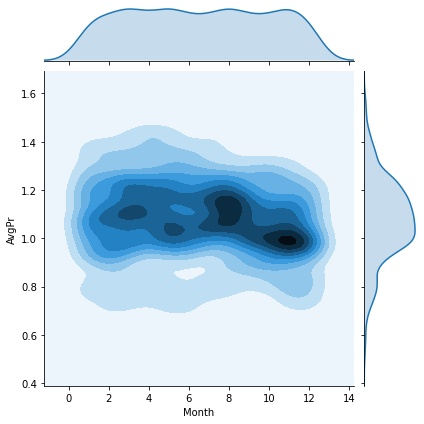

In [87]:
sns.jointplot(x='Month',y='AvgPr', data=a2015, kind='kde')

In [69]:
avo_pivot= pd.pivot_table(data=avo4, index='Location', values=['AvgPr','TVol', 'LBags', '4225L', 'Type'], columns= 'Year')
avo_pivot.head()

4225L                    AvgPr            \
Year                           2015           2019      2015      2019   
Location                                                                 
Albany                 61764.253654  102825.485000  1.171923  1.260385   
Atlanta                35386.637308   33618.435962  1.052308  1.068846   
Baltimore/Washington  487421.365385  467066.467885  1.168077  1.355000   
Boise                  10164.187115    6748.566923  1.054038  1.335385   
Boston                409901.282692  513963.240385  1.144038  1.396731   

                             LBags                          TVol  \
Year                          2015           2019           2015   
Location                                                           
Albany                  346.097500    5711.570192   76208.734231   
Atlanta               20621.039808   79147.914808  440346.444038   
Baltimore/Washington   4517.016346  108575.997885  768141.489231   
Boise                   354.146538   24528.243654   70885.752885   
Boston                 1451.942692   39781.165769  523780.612115   

                                     
Year                           2019  
Location                             
Albany                122483.080385  
Atlanta               721526.170385  
Baltimore/Washington  919231.600000  
Boise                 102344.003846  
Boston                687918.475577

In [88]:
pivot2= pd.pivot_table(data=avo2, index='Year', values='AvgPr')
pivot2

,AvgPr
Year,
2015,1.077963
2016,1.105595
2017,1.294888
2018,1.141092
2019,1.187179
2020,1.104046


In [93]:
left= avo2['AvgPr']
right= avo2['Year']

yes= pd.merge(left, right, how='inner', on=right)
yes

,key_0,AvgPr,Year
0,2015,1.22,2015
1,2015,1.22,2015
2,2015,1.22,2015
3,2015,1.22,2015
4,2015,1.22,2015
...,...,...,...
40013347,2020,0.89,2020
40013348,2020,0.89,2020
40013349,2020,0.89,2020
40013350,2020,0.89,2020


In [99]:
a2016= avo2.loc[avo1['Year']==2016]
a2016

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
5615,2016-01-03,1.03,149038.15,939.71,139735.90,132.35,8230.19,8056.43,173.76,conventional,2016,Albany,1
5617,2016-01-03,1.05,449263.47,350316.16,32958.06,396.68,65592.57,43674.84,21906.93,conventional,2016,Atlanta,1
5619,2016-01-03,1.11,816760.46,54491.78,583418.06,27147.33,151703.29,149408.43,2294.86,conventional,2016,Baltimore/Washington,1
5621,2016-01-03,0.77,106106.95,43868.70,10276.84,5431.66,46529.75,46476.08,17.00,conventional,2016,Boise,1
5623,2016-01-03,1.01,610622.03,5112.51,492477.86,21182.52,91849.14,91579.91,269.23,conventional,2016,Boston,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11221,2016-12-25,1.46,46036.04,748.11,29452.82,2.26,15832.85,14866.23,966.62,conventional,2016,Syracuse,12
11223,2016-12-25,0.93,445441.47,157380.83,104316.60,63.53,183680.51,87877.06,95803.45,conventional,2016,Tampa,12
11225,2016-12-25,1.00,30287853.70,9255125.20,10282925.61,541972.42,10207830.47,7709584.33,2417144.92,conventional,2016,Total U.S.,12
11227,2016-12-25,0.92,5720079.58,1951252.95,1240717.89,114035.00,2414073.74,1681100.98,731388.25,conventional,2016,West,12


In [103]:
a2016.tail(60)

,Date,AvgPr,TVol,4046S,4225L,4770XL,TBags,SBags,LBags,Type,Year,Location,Month
11111,2016-12-18,0.97,137885.02,58408.64,7756.92,50.40,71669.06,52786.07,18882.99,conventional,2016,St. Louis,12
11113,2016-12-18,1.42,42029.51,770.80,28068.62,5.00,13185.09,12270.19,908.23,conventional,2016,Syracuse,12
11115,2016-12-18,0.93,412891.05,132947.11,102323.35,48.96,177571.63,77777.03,99658.49,conventional,2016,Tampa,12
11117,2016-12-18,0.96,29583882.61,9394065.91,10339168.20,427872.42,9422776.08,6970320.34,2358443.96,conventional,2016,Total U.S.,12
11119,2016-12-18,0.88,5618429.48,2112070.11,1168212.84,89996.89,2248149.64,1571421.56,673464.14,conventional,2016,West,12
11121,2016-12-18,0.76,790789.79,388322.10,66773.28,12379.19,323315.22,142224.29,180677.60,conventional,2016,West Tex/New Mexico,12
11123,2016-12-25,1.52,73341.73,3202.39,58280.33,426.92,11432.09,11017.32,411.83,conventional,2016,Albany,12
11125,2016-12-25,0.91,502787.29,205855.78,86015.43,184.62,210731.46,118884.36,91847.10,conventional,2016,Atlanta,12
11127,2016-12-25,1.47,550947.61,50818.61,344699.92,8529.79,146899.29,142957.45,2629.52,conventional,2016,Baltimore/Washington,12
11129,2016-12-25,1.03,71168.92,27464.22,2892.64,6681.19,34130.87,33449.40,662.22,conventional,2016,Boise,12
